In [38]:
# importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [39]:
# data collection and analysis

insurance_dataset= pd.read_csv('insurance.csv')
print(insurance_dataset.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [40]:
print(insurance_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [41]:
print(insurance_dataset.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [42]:
print(insurance_dataset.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


C:\Users\Sneh Patel\AppData\Local\Temp\ipykernel_17696\2707170891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["age"])


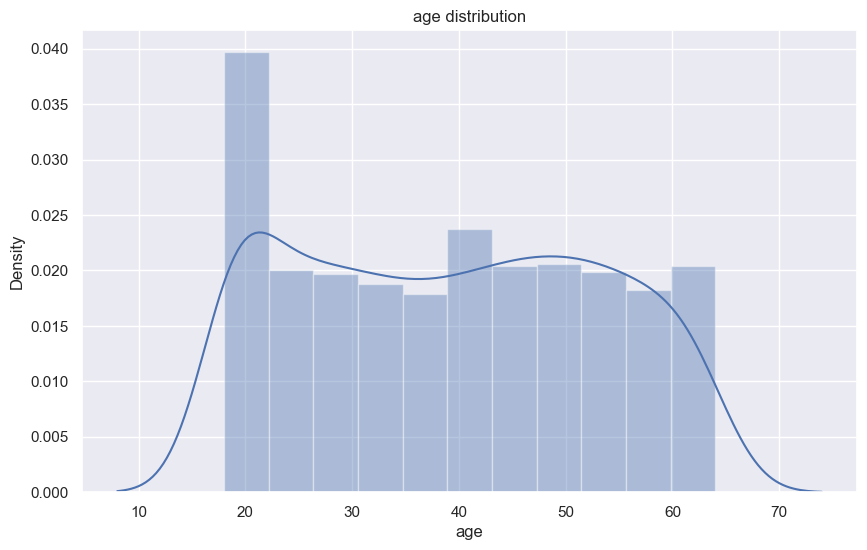

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(insurance_dataset["age"])
plt.title("age distribution")
plt.show()

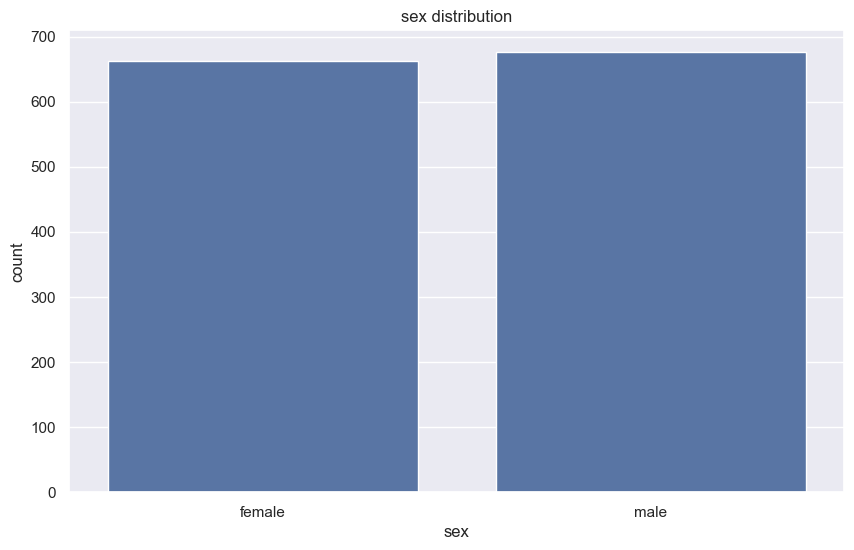

sex
male      676
female    662
Name: count, dtype: int64


In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x="sex",data=insurance_dataset)
plt.title("sex distribution")
plt.show()
print(insurance_dataset["sex"].value_counts())

In [45]:
# data preprocessing

insurance_dataset.replace({"sex":{"male":0,"female":1}},inplace=True)
insurance_dataset.replace({"smoker":{"yes":0,"no":1}},inplace=True)
insurance_dataset.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)
print(insurance_dataset.head())

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       0       1  16884.92400
1   18    0  33.770         1       1       0   1725.55230
2   28    0  33.000         3       1       0   4449.46200
3   33    0  22.705         0       1       3  21984.47061
4   32    0  28.880         0       1       3   3866.85520


C:\Users\Sneh Patel\AppData\Local\Temp\ipykernel_17696\2571835519.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({"sex":{"male":0,"female":1}},inplace=True)
C:\Users\Sneh Patel\AppData\Local\Temp\ipykernel_17696\2571835519.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({"smoker":{"yes":0,"no":1}},inplace=True)
C:\Users\Sneh Patel\AppData\Local\Temp\ipykernel_17696\2571835519.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

In [46]:
# splitting features and target

X=insurance_dataset.drop(columns="charges",axis=1)
y=insurance_dataset["charges"]
print(X.head())
print(y.head())

   age  sex     bmi  children  smoker  region
0   19    1  27.900         0       0       1
1   18    0  33.770         1       1       0
2   28    0  33.000         3       1       0
3   33    0  22.705         0       1       3
4   32    0  28.880         0       1       3
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [47]:
# splitting data into training data and testing data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
# model training

regressor=LinearRegression()
regressor.fit(X_train,y_train)
training_data_prediction=regressor.predict(X_train)

In [50]:
r2=r2_score(y_train,training_data_prediction)
print("r2 score is on training data: ",r2)

r2 score is on training data:  0.751505643411174


In [51]:
testing_data_prediction=regressor.predict(X_test)
r2=r2_score(y_test,testing_data_prediction)
print("r2 score is on testing data: ",r2)

r2 score is on testing data:  0.7447273869684077


In [54]:
input_data=(31,1,25.74,0,1,0) #tuple
input_data_array=np.asarray(input_data) #numpy array
input_data_reshaped=input_data_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)[0]
print("the insurance cost is: ",prediction)

the insurance cost is:  3760.0805764960496


c:\Users\Sneh Patel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
